In [242]:
# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [243]:
#Defines Global Variables data entries
TOTAL_DATA = 150

# Splits data into training(80%) and testing(20%)
TRAINING_DATA = int(TOTAL_DATA*0.8) 
TESTING_DATA = int(TOTAL_DATA*0.2)

# Number of input features
FEATURE_NUMBER = 4

# Number of classes and respective indexing
CLASS_NUMBER = 3
CLASSNAMES = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [244]:
# Read in data
data = pd.read_csv('../DataSets/Iris.csv')

#Splits into 2 classes instead of 3
#data = data[0:100]

# Shuffle data
data = data.sample(frac = 1)

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
23,24,5.1,3.3,1.7,0.5,Iris-setosa
89,90,5.5,2.5,4.0,1.3,Iris-versicolor
72,73,6.3,2.5,4.9,1.5,Iris-versicolor
41,42,4.5,2.3,1.3,0.3,Iris-setosa
111,112,6.4,2.7,5.3,1.9,Iris-virginica


In [245]:
# Pulling feature data and splicing it for training/testing using 80-20 ratio
x_train = data.iloc[:TRAINING_DATA, 1:FEATURE_NUMBER+1].values
x_test = data.iloc[TRAINING_DATA:, 1:FEATURE_NUMBER+1].values

# Standardizes the data by dividing the entries by standard deviation (i.e calculating how many standard deviations the entries are from the center)
x_train = (x_train - np.mean(x_train, axis=0)) / np.std(x_train, axis=0)
x_test = (x_test - np.mean(x_test, axis=0)) / np.std(x_test, axis=0)

# Reshape for matrix multiplication
x_train = x_train.reshape(FEATURE_NUMBER, TRAINING_DATA)
x_test = x_test.reshape(FEATURE_NUMBER, TESTING_DATA)



In [246]:
# Pulling label data and splicing it for training/testing using 80-20 ratio
y_train_data = data.iloc[:TRAINING_DATA, -1].values
y_test_data = data.iloc[TRAINING_DATA:, -1].values

# Create vectorized representations of each data point's class membership
y_train = np.zeros(shape=(CLASS_NUMBER, TRAINING_DATA))
y_test = np.zeros(shape=(CLASS_NUMBER, TESTING_DATA))

# Setting numeric labels for each data point's class
for row in range(CLASS_NUMBER):
    y_train[row, :TRAINING_DATA]  = [ele == CLASSNAMES[row] for ele in y_train_data]
    y_test[row, :TESTING_DATA] = [ele == CLASSNAMES[row] for ele in y_test_data]

In [247]:
# Randomly initialize weights and bias matricies
w = np.random.rand(CLASS_NUMBER, FEATURE_NUMBER)
b = np.random.rand(CLASS_NUMBER, 1)



In [248]:
#Class coresspondance function, returns a vector (z), which will be input into softmax function
#The highest number in z represents the correct class
def class_corr(weights, bias, x):
    
    numData = x.shape[1]
    #print(numData)
    z = weights.dot(x)
    #print(z)
    for input in range(numData):
        z[0:CLASS_NUMBER, input:input+1] += bias

    return z

z = class_corr(w, b, x_test)
print(z)



[[ 0.96370926  2.40225026  0.31102049 -0.68601878  3.22176407  3.54276247
   1.06514042  0.1730935   0.62489938  1.75029653 -0.86819231  0.00361044
   0.12088747  1.25002504  0.05969437  0.83772658  0.4487307   0.18387634
   1.81651722 -0.67049352  3.16624085  0.70868208 -0.18827737  0.38865287
  -0.11266549 -0.3756274   2.56524227  1.84504351  2.34147444  2.12395765]
 [ 0.23780665  2.70437157 -0.99597379 -1.43540801  3.30796838  2.82418497
   1.39384041  1.01101505 -0.80790787  2.03092126 -2.37647881 -1.24799958
  -1.27077358  1.09927412 -0.70889417 -0.95995976 -0.57536496  1.0362649
   0.18779261 -0.96601347  2.12846814 -0.98961388  0.02869458  1.12377005
  -0.77258162 -0.68749386  2.05356391  1.89844376  2.11077929  1.39184173]
 [ 0.14109623  1.19274216 -0.13984253 -0.81057883  1.59347784  1.67520787
   0.16401748 -0.33564737 -0.04727279  0.5851751  -1.10489698 -0.39220469
  -0.29221194  0.08275573  0.06523455  0.35865179  0.58036096 -0.31550031
   1.33510021 -0.38609455  2.23980263

In [249]:
#Softmax Function
#expnentiates all elements of the z vector and divides by their sum to see class probability
def softmax(z):

    #creates empty probability array
    y_hat = np.empty([z.shape[0], z.shape[1]])
    numData = z.shape[1]

    #exponentiates the matrix
    z_exp = np.exp(z)

    #Converts z vector into probability distribution
    for input in range(numData):
        z_sum = np.sum(z_exp[0:CLASS_NUMBER, input:input+1])
        y_hat[0:CLASS_NUMBER, input:input+1] = z_exp[0:CLASS_NUMBER, input:input+1]/z_sum
    return y_hat


y_pred = softmax(z)
print(softmax(z))


[[0.51997486 0.37720628 0.52418858 0.42453103 0.43738895 0.60903336
  0.35774663 0.25557083 0.57167804 0.37938549 0.49738545 0.51041892
  0.52348938 0.46055836 0.40498576 0.56021218 0.40003079 0.25302678
  0.55124154 0.32540351 0.57136186 0.53913483 0.29597805 0.24594901
  0.40037411 0.37288725 0.49728589 0.37131779 0.47242358 0.54027062]
 [0.25160939 0.51025649 0.14186235 0.20065678 0.47676663 0.29687036
  0.49696768 0.59076666 0.13642414 0.50228995 0.11006585 0.14600221
  0.13017187 0.39610869 0.18777855 0.09281695 0.14365949 0.59340902
  0.10814235 0.24214725 0.20240083 0.09865903 0.36769628 0.51298233
  0.20695125 0.27298303 0.29811721 0.39168523 0.37509557 0.25981095]
 [0.22841575 0.11253723 0.33394907 0.37481219 0.08584442 0.09409627
  0.14528569 0.15366251 0.29189782 0.11832456 0.3925487  0.34357886
  0.34633875 0.14333295 0.40723568 0.34697087 0.45630972 0.1535642
  0.34061611 0.43244924 0.22623732 0.36220614 0.33632567 0.24106866
  0.39267464 0.35412971 0.20459691 0.23699698 0

In [250]:
#Loss function
#Returns the sum of all probabilities compared to the actual class
def cost(y, y_pred):

    total_loss = 0

    #Finds number of data samples
    numData = y.shape[1]

    #Manipulates y_pred into right form for the loss function
    y_pred = -1*np.log(y_pred)

    #iterates over all data samples
    for column in range(numData):

        #Computes total class loss for each data sample and sums them
        y_cur = y[0:CLASS_NUMBER, column:column+1].transpose()
        y_pred_cur = (y_pred[0:CLASS_NUMBER, column:column+1])
        total_loss += y_cur.dot(y_pred_cur)[0][0]

    #Divdes by number of data samples to find average error
    total_loss = total_loss/numData
    return total_loss
    
    

        



cost(y_test, y_pred)

1.1094361187380395

In [251]:
# Take the gradients of the loss with respect to weights and bias
def findGradients(x, y, y_pred):
    # Number of data samples
    numData = x.shape[1]

    # Calculate error for gradient computations
    error = y_pred - y
    error = error.transpose()
    

    # Dictionary for holding gradient values
    gradientDict = dict()
    gradientDict['gradWeights'] = np.array((1/numData) * x.dot(error))
    gradientDict['gradBias'] =  ((1/numData) * error.sum(axis=0)).reshape(1, CLASS_NUMBER)
    
    
    return gradientDict
y_pred = softmax(z)
findGradients(x_test, y_test, y_pred)

{'gradWeights': array([[-0.03465613,  0.08529486, -0.05063874],
        [ 0.06908147, -0.11210407,  0.0430226 ],
        [ 0.1514389 , -0.04177837, -0.10966054],
        [-0.06461566,  0.0782078 , -0.01359214]]),
 'gradBias': array([[ 0.14168132, -0.10862819, -0.03305314]])}

In [252]:
# Repetitively perform gradient descent to improve model 
def gradientDescent(x, y, weights, bias, losses, max_iter, learning_rate):
    for i in range(max_iter): 
        z = class_corr(weights, bias, x)
        #print(z.shape)
        y_pred = softmax(z)
        gradients = findGradients(x, y, y_pred)


        # Compute gradient descent
        weights = weights - ((learning_rate * gradients["gradWeights"]).transpose())
        bias = bias - ((learning_rate * gradients["gradBias"].transpose()))
       

        # Not required - meant to visualize model's performance
        loss = cost(y, y_pred)
        losses.append(loss)

        learning_rate *= 0.95

    return weights, bias


In [253]:
# List for storing log loss over time
losses = []

w, b = gradientDescent(x_train, y_train, w, b, losses, max_iter=150, learning_rate=0.1)

#print(w)
#print(b)

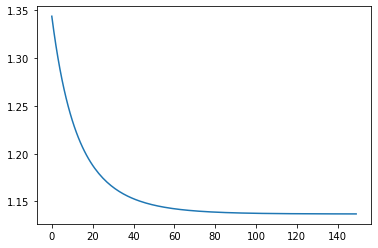

In [254]:
plt.plot(losses)

In [255]:
# Calculates accuracy of test data
def accuracy(y, y_pred):

    total_correct = 0
    confusion_matrix = np.zeros(shape=(CLASS_NUMBER, CLASS_NUMBER))

    numData = y.shape[1]
    
    # Iterating through all of data
    for data in range(numData):
        # Returns array for index of max probabilities for each data point 
        y_indexes = np.argmax(y, axis=0)
        y_pred_indexes = np.argmax(y_pred, axis=0)
        
        confusion_matrix[y_indexes[data]][y_pred_indexes[data]] += 1
        total_correct = np.sum(y_indexes == y_pred_indexes)
        
    total_accuracy = total_correct/numData
    return confusion_matrix, total_accuracy 


In [256]:
# Accuracy and confusion matrix check
z = class_corr(w, b, x_test)
y_pred = softmax(z)

confusion_matrix, model_acc = accuracy(y_test, y_pred)

print(confusion_matrix)
print(model_acc)


[[6. 3. 0.]
 [5. 4. 3.]
 [5. 2. 2.]]
0.4


NameError: name 'pred_pos' is not defined